In [105]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

expressions = pd.read_csv("gene_expression.csv")
expressions = expressions.drop(['ID_REF'], axis = 1)
expressions = expressions[expressions['Symbol'].notnull()]

/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
# extract labels

labels = expressions.iloc[0, :]
labels = labels.map({"disease status: non-asthmatic": 0, "disease status: asthmatic": 1, "disease status: N/A": 2})
bad_index = np.where(labels > 1)
labels = labels[labels <= 1]

bad_cols = expressions.columns[bad_index]
expressions = expressions.drop(bad_cols, axis = 1)
expressions = expressions[1:]
# expressions.iloc[0, :] = labels
# expressions.loc[0, 'Symbol'] = 'label'

In [107]:
cols = expressions.columns
for key in cols[1:]:
    expressions[key] = pd.to_numeric(expressions[key])

In [108]:
expressions = expressions.groupby(['Symbol']).mean()

In [135]:
## Subset genes based on network results

shortlist = pd.read_csv("edgelist_Virtualitics.csv")

# top 5 communities
community_num = ["Community " + str(x) for x in [0, 27, 48, 2, 23, 7]]

In [136]:
comm_shortlist = shortlist[shortlist['Louvain Community'].isin(community_num)]
community_genes = comm_shortlist['Node ID']

In [137]:
community_expressions = expressions[expressions.index.isin(community_genes)]

comm_mapping = comm_shortlist.set_index('Node ID').to_dict()['Louvain Community']

In [138]:
mapped_comm = community_expressions.index.to_series().map(comm_mapping)

In [139]:
control_index = labels[labels == 0].index
asthma_index = labels[labels == 1].index

In [140]:
community = {}
community['control'] = community_expressions[control_index]
community['asthma'] = community_expressions[asthma_index]
community['asthma']['community'] = mapped_comm
community['control']['community'] = mapped_comm

In [141]:
community['control']

,GSM870902,GSM870908,GSM870909,GSM870916,GSM870920,GSM870925,GSM870928,GSM870931,GSM870933,GSM870935,...,GSM871016,GSM871017,GSM871020,GSM871021,GSM871022,GSM871025,GSM871026,GSM871027,GSM871032,community
Symbol,,,,,,,,,,,,,,,,,,,,,
AAAS,7.270958,7.400666,7.274018,7.305615,7.339042,7.547801,7.329639,7.409556,7.300221,7.824174,...,6.910281,6.927554,7.239283,6.838720,7.050743,7.252188,7.018683,6.891862,7.083908,Community 27
AAR2,8.005934,7.788928,7.795040,8.175761,7.790937,7.630951,7.840549,7.940925,7.945878,8.135699,...,8.176222,8.070155,8.009229,7.881362,7.962036,7.891650,7.910554,7.820054,8.107168,Community 2
ABCA2,5.441511,5.464134,4.936652,5.750829,5.393898,5.455789,5.291827,5.463618,5.174071,5.631628,...,4.987576,5.156936,5.132485,5.417698,5.529799,5.577380,5.645695,5.104899,5.169124,Community 27
ABCC1,7.290247,7.968351,8.225717,7.978555,7.823975,7.750453,7.776225,7.538786,7.778362,7.747120,...,7.676370,7.554297,7.558153,7.562079,7.847582,7.692821,7.588472,7.878840,7.931561,Community 27
ABCD4,6.316590,6.257385,6.164607,6.193646,6.287232,5.882032,6.041392,5.923500,6.118146,6.096498,...,6.440137,6.269538,6.415836,6.220065,6.504010,6.207760,6.171836,6.245180,5.892234,Community 48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF821,5.630131,5.529426,5.238278,5.444373,5.544027,5.687905,5.444817,5.569761,5.517299,5.540761,...,5.609227,5.440470,5.705736,5.738321,5.713382,5.714240,5.476501,5.312385,5.525644,Community 23
ZNF844,4.879632,4.926237,4.489063,4.917928,4.808789,4.614156,4.462999,4.802756,4.956813,4.874876,...,5.017132,4.829034,4.616763,4.625856,4.597220,4.440371,4.343730,5.135127,4.608778,Community 23
ZNF879,6.064936,6.722705,5.882056,6.606961,7.178251,6.409577,6.764717,6.852185,6.319512,5.890456,...,6.628029,6.786501,6.381116,6.001436,7.155586,6.451342,6.758449,6.876427,6.541575,Community 27


In [152]:
## Study just DKK1

import matplotlib.pyplot as plt
asthma = community['asthma']
control = community['control']

In [236]:
n_control = control.shape[1] - 1
n_asthma = asthma.shape[1] - 1

In [165]:
control_X, asthma_X = control.loc[['DKK1']].values[:, :-1], asthma.loc[['DKK1']].values[:, :-1]

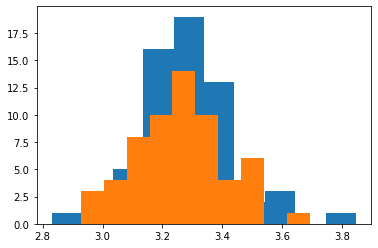

In [164]:
control_X = control_X[control_X < 5]
plt.hist(control_X)
plt.hist(asthma_X)
plt.show()

In [237]:
X = np.concatenate([control_X, asthma_X], axis = 1)
Y = [0] * n_control + [1] * n_asthma
df = pd.DataFrame({"X": X[0], "Y": Y})

In [238]:
X.shape

(1, 124)

In [218]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(np.array(df["X"]).reshape(-1, 1), df["Y"])

clf.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [204]:
np.squeeze(X.T).shape

(124,)

In [239]:
import statsmodels.api as sm

log_reg = sm.Logit(df[["Y"]], df[["X"]].astype('float')).fit()


Optimization terminated successfully.
         Current function value: 0.692135
         Iterations 3


In [240]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  124
Model:                          Logit   Df Residuals:                      123
Method:                           MLE   Df Model:                            0
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:               0.0007101
Time:                        15:37:46   Log-Likelihood:                -85.825
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.0270      0.054     -0.501      0.617      -0.133       0.079
==============================================================================
"""

In [244]:
## all of community 0 analysis

comm0 = comm_shortlist[comm_shortlist['Louvain Community'] == "Community 0"]['Node ID']

In [267]:
len(Y)

124

In [275]:
# get the X matrix for all these genes
def plotXY(comm0):
    c = control[control.index.isin(comm0)].drop(['community'], axis = 1)
    a = asthma[asthma.index.isin(comm0)].drop(['community'], axis = 1)
    
    X = np.concatenate([c, a], axis = 1)
    X = normalize(X, axis=1, norm='l1')
    log_reg = sm.Logit(Y, X.T).fit()
    return log_reg 

plotXY(comm0)

         Current function value: inf
         Iterations: 35


/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [273]:
from sklearn.preprocessing import normalize

normalize(X, axis=1, norm='l1')

array([[0.00849377, 0.00783585, 0.00868762, ..., 0.00799736, 0.00743096,
        0.00758686],
       [0.00806381, 0.0080287 , 0.00857217, ..., 0.00811207, 0.0079027 ,
        0.00799768],
       [0.00833414, 0.0080641 , 0.00842013, ..., 0.00798104, 0.00820794,
        0.00768667],
       ...,
       [0.00798829, 0.00811553, 0.00781662, ..., 0.00830947, 0.00807278,
        0.00764935],
       [0.00850777, 0.0086258 , 0.0078654 , ..., 0.00801623, 0.00803401,
        0.0074183 ],
       [0.00762019, 0.00805545, 0.00813432, ..., 0.00822474, 0.00825422,
        0.00819556]])

In [277]:
import pickle

with open("community_expr.pkl", "wb") as f:
    pickle.dump(community, f)
    